# BME296 Final Project: *M. tuberculosis* pcaA Gene
This Notebook will contain an analysis of mycolic acid synthase, an enzyme represented by the pcaA gene in *Mycobacterium tuberculosis*.

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cobra as cb

from Bio.PDB import *
import nglview as nv
import ipywidgets

from tabulate import tabulate

## 1. Molecular Scale
In this section of the Notebook, the protein's structure will be evaluated using information provided in the AlphaFold database.

In [3]:
pdb_parser = PDBParser()
structure = pdb_parser.get_structure("P", "Protein_Structure.pdb")
view = nv.show_biopython(structure)
view

NGLWidget()

## 2. Cellular Scale
This section of the Notebook will explore the protein on the cellular level, primarily through flux balance analysis.

### *M. tuberculosis* Metabolic Model

In [4]:
# load model
model = cb.io.read_sbml_model('iEK1008.xml')

In [5]:
# display model information
model

Name,iEK1008
Memory address,7fe59d16f550
Number of metabolites,998
Number of reactions,1226
Number of genes,1008
Number of groups,0
Objective expression,1.0*BIOMASS__2 - 1.0*BIOMASS__2_reverse_ecbec
Compartments,"cytosol, extracellular space"


In [6]:
# define the environment

# export all metabolites, import no metabolites
for ex in model.exchanges:
    ex.lower_bound = 0
    ex.upper_bound = 1000

In [7]:
# metabolite exchanges
met_ex = ['EX_ala_B_e','EX_ala__D_e','EX_ala__L_e', 'EX_asn__L_e','EX_asp__L_e','EX_ca2_e','EX_cl_e','EX_fe2_e','EX_fe3_e',
          'EX_gal_e','EX_gln__L_e','EX_glu__L_e','EX_gly_e','EX_h_e','EX_h2o_e','EX_his__L_e','EX_ile__L_e','EX_k_e',
          'EX_leu__L_e','EX_lys__L_e','EX_met__L_e','EX_mg2_e','EX_na1_e','EX_nh4_e','EX_o2_e','EX_phe__L_e','EX_pi_e',
          'EX_ser__D_e','EX_ser__L_e','EX_so4_e','EX_thr__L_e','EX_tyr__L_e','EX_val__L_e']

# unlimited import of each metabolite
for ex_id in met_ex:
    model.exchanges.get_by_id(ex_id).lower_bound = -1000

In [8]:
# base optimal value:
base_solution = model.optimize()

# create table
table = [['Metabolite Exchange', 'Removed']]

for ex_id in met_ex:
    temp_array = [model.exchanges.get_by_id(ex_id).name]

    model.exchanges.get_by_id(ex_id).lower_bound = 0
    solution = model.optimize()
    temp_array.append(solution.objective_value)
    
    # add tempArray to main array
    table.append(temp_array)
    
    # reset value to -1000
    model.exchanges.get_by_id(ex_id).lower_bound = -1000

# tabulate!
print("Base Optimal Solution: ", base_solution.objective_value)
print(tabulate(table, headers='firstrow'))

Base Optimal Solution:  29.299628571551292
Metabolite Exchange            Removed
------------------------  ------------
Beta-Alanine exchange     29.2996
D-Alanine exchange        29.2996
L-Alanine exchange        29.2996
L-Asparagine exchange     29.2505
L-Aspartate exchange      29.2996
Calcium exchange          29.2996
Chloride exchange         29.2996
Fe2+ exchange             29.2996
Fe3+ exchange             -2.99475e-14
D-Galactose exchange      20.0027
L-Glutamine exchange      29.2996
L-Glutamate exchange      28.0195
Glycine exchange          29.2996
H+ exchange               29.2996
H2O exchange              29.2996
L-Histidine exchange      29.0992
L-Isoleucine exchange     29.2996
K+ exchange               29.2996
L-Leucine exchange        29.2996
L-Lysine exchange         29.2455
L-Methionine exchange     29.2128
Mg exchange               29.2996
Sodium exchange           29.2996
Ammonia exchange          29.2996
O2 exchange               -3.75044e-13
L-Phenylalanine exc

In [9]:
# reimport of each metabolite
for ex_id in met_ex:
    model.exchanges.get_by_id(ex_id).lower_bound = -1000
solution = model.optimize()

#### Gradual Removal of Metabolites with Substantial Decrease in Optimal Solution

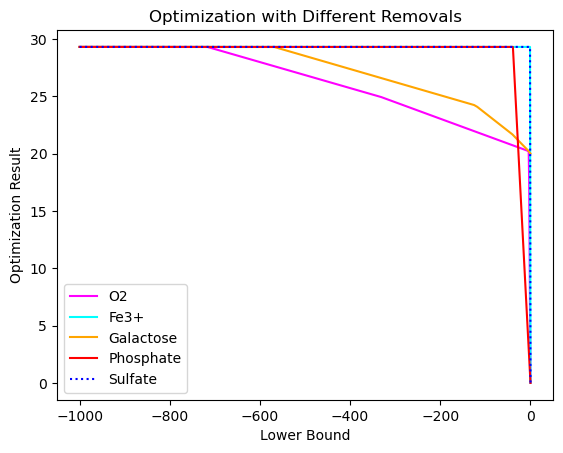

In [10]:
# Seeing where chosen metabolites
# x axis values
x = np.linspace(-1000, 0, 1001)
# corresponding y axis values
y_o2 = []
y_fe3 = []
y_gal = []
y_phos = []
y_sulf = []

# metabolites being graphed: 
metabolite = ['EX_o2_e', 'EX_fe3_e', 'EX_gal_e', 'EX_pi_e', 'EX_so4_e']

for metab in metabolite:
    for xVar in x:
        # Run simulation each time for each metabolite
        model.exchanges.get_by_id(metab).lower_bound = xVar
        solution = model.optimize()
        # adding to appropriate y list
        if (metab == 'EX_o2_e'):
            y_o2.append(solution.objective_value)
        elif (metab == 'EX_fe3_e'):
            y_fe3.append(solution.objective_value)
        elif (metab == 'EX_gal_e'):
            y_gal.append(solution.objective_value)
        elif (metab == 'EX_pi_e'):
            y_phos.append(solution.objective_value)
        elif (metab == 'EX_so4_e'):
            y_sulf.append(solution.objective_value)
    # resetting value for next metabolite
    model.exchanges.get_by_id(metab).lower_bound = -1000

# plotting
plt.plot(x, y_o2, color='magenta')
plt.plot(x, y_fe3, color='cyan')
plt.plot(x, y_gal, color='orange')
plt.plot(x, y_phos, color='red')
plt.plot(x, y_sulf, color='blue', linestyle=':')

# naming the x axis
plt.xlabel('Lower Bound')
# naming the y axis
plt.ylabel('Optimization Result')

plt.legend(['O2', 'Fe3+', 'Galactose', 'Phosphate', 'Sulfate'])
  
plt.title('Optimization with Different Removals')
  
plt.show()

# resetting all, just in case
for metab in metabolite:
    model.exchanges.get_by_id(metab).lower_bound = -1000

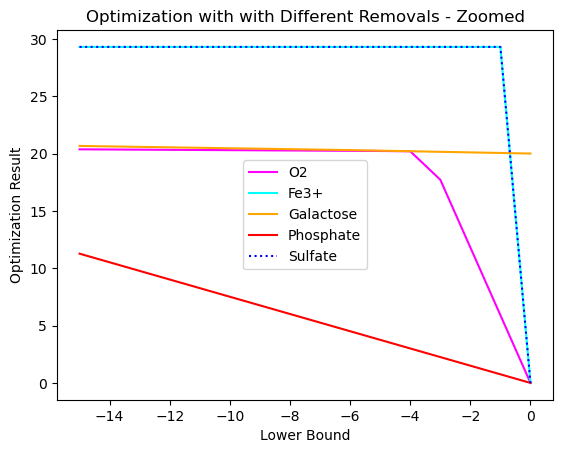

In [11]:
# Zooming in!
# x axis values
x = np.linspace(-15, 0, 16)
# corresponding y axis values
y_o2 = []
y_fe3 = []
y_gal = []
y_phos = []
y_sulf = []

# metabolites being graphed: 
metabolite = ['EX_o2_e', 'EX_fe3_e', 'EX_gal_e', 'EX_pi_e', 'EX_so4_e']

for metab in metabolite:
    for xVar in x:
        # Run simulation each time for each metabolite
        model.exchanges.get_by_id(metab).lower_bound = xVar
        solution = model.optimize()
        # adding to appropriate y list
        if (metab == 'EX_o2_e'):
            y_o2.append(solution.objective_value)
        elif (metab == 'EX_fe3_e'):
            y_fe3.append(solution.objective_value)
        elif (metab == 'EX_gal_e'):
            y_gal.append(solution.objective_value)
        elif (metab == 'EX_pi_e'):
            y_phos.append(solution.objective_value)
        elif (metab == 'EX_so4_e'):
            y_sulf.append(solution.objective_value)
    # resetting value for next metabolite
    model.exchanges.get_by_id(metab).lower_bound = -1000

# plotting
plt.plot(x, y_o2, color='magenta')
plt.plot(x, y_fe3, color='cyan')
plt.plot(x, y_gal, color='orange')
plt.plot(x, y_phos, color='red')
plt.plot(x, y_sulf, color='blue', linestyle=':')

# naming the x axis
plt.xlabel('Lower Bound')
# naming the y axis
plt.ylabel('Optimization Result')

plt.legend(['O2', 'Fe3+', 'Galactose', 'Phosphate', 'Sulfate'])
  
plt.title('Optimization with with Different Removals - Zoomed')
  
plt.show()

# resetting all, just in case
for metabs in metabolite:
    model.exchanges.get_by_id(metabs).lower_bound = -1000

#### Evaluating Nitrogen Sources

In [12]:
# removing all amino acids
amino_acids = ['EX_ala_B_e', 'EX_ala__D_e', 'EX_ala__L_e', 'EX_asn__L_e', 'EX_asp__L_e', 'EX_gln__L_e', 
              'EX_glu__L_e', 'EX_gly_e', 'EX_his__L_e', 'EX_ile__L_e', 'EX_leu__L_e', 'EX_lys__L_e', 
              'EX_met__L_e', 'EX_phe__L_e', 'EX_ser__L_e', 'EX_ser__D_e', 'EX_thr__L_e', 'EX_tyr__L_e',
              'EX_val__L_e']

for ids in amino_acids:
    model.exchanges.get_by_id(ids).lower_bound = 0
solution = model.optimize()
print('Amino acids removed:',solution.objective_value)

# removing ammonia too
model.exchanges.get_by_id('EX_nh4_e').lower_bound = 0
solution = model.optimize()
print('Amino acids and ammonia removed:',solution.objective_value)

# resetting
model.exchanges.get_by_id('EX_nh4_e').lower_bound = -1000
for ids in amino_acids:
    model.exchanges.get_by_id(ids).lower_bound = -1000

Amino acids removed: 20.042762627814486
Amino acids and ammonia removed: -2.6877127262560486e-13


#### Evaluating pH and Mg<sup>2+</sup> Requirements

In [13]:
# remove glutamate
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
solution = model.optimize()
print('Glutamate removed:',solution.objective_value)
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000

# remove aspartate
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
solution = model.optimize()
print('Aspartate removed:',solution.objective_value)
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000

# take out both glutamate and aspartate 
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
solution = model.optimize()
print('Both removed:',solution.objective_value)

# reset glutamate and aspartate
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000

Glutamate removed: 28.01949125557293
Aspartate removed: 29.29962857155175
Both removed: 26.819322006555677


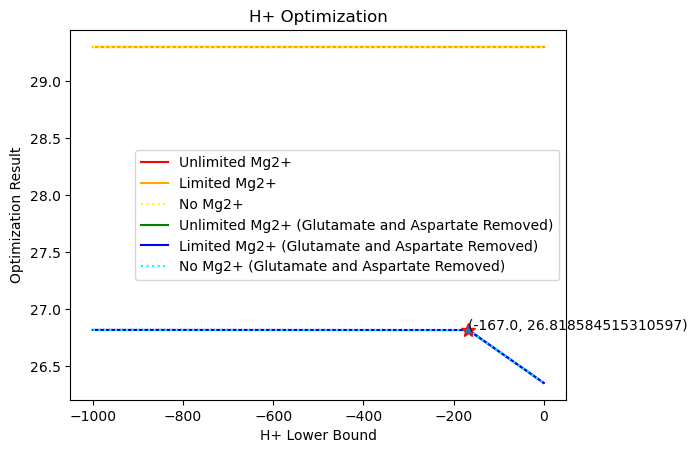

In [15]:
# Plotting Magnesium based on H+ value
# x axis = H+ concenration
# y asix = optimization result
# 3 lines, one unlimited Mg2+, one limited Mg2+, one none

# resetting all values
for ex_id in met_ex:
    model.exchanges.get_by_id(ex_id).lower_bound = -1000
    
point_not_found = True

# x axis values
x = np.linspace(-1000, 0, 1001)

# corresponding y axis values
y_unlimited_mg2 = []
y_limited_mg2 = []
y_no_mg2 = []
y_unlimited_mg2_removed = []
y_limited_mg2_removed = []
y_no_mg2_removed = []

for xVar in x:        
    # Unlimited Mg2+
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = -1000 # Unlimitted
    model.exchanges.get_by_id('EX_h_e').lower_bound = xVar 
    solution = model.optimize()
    y_unlimited_mg2.append(solution.objective_value)  
    
    # Limited Mg2+
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = -5 # Limited
    solution = model.optimize()
    y_limited_mg2.append(solution.objective_value)
    
    # No Mg2+
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = 0 # None
    solution = model.optimize()
    y_no_mg2.append(solution.objective_value)
    
    # Taking out glutamate and aspartate 
    model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
    model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
    
    # Unlimited Mg2+ no glutamate and aspartate
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = -1000
    solution = model.optimize()
    y_unlimited_mg2_removed.append(solution.objective_value)
    # labeling point in graph where decreasing begins
    if (solution.objective_value < 26.819 and point_not_found):
        point_not_found = False # stops this from happening every loop
        x_removed_point = xVar
        y_removed_point = solution.objective_value
    
    # Limited Mg2+ no glutamate and aspartate
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = -5 # Limited
    solution = model.optimize()
    y_limited_mg2_removed.append(solution.objective_value)
    
    # No Mg2+ no glutamate and aspartate
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = 0 # None
    solution = model.optimize()
    y_no_mg2_removed.append(solution.objective_value)
    
    # resetting glutamate and aspartate
    model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000
    model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000
    
# plotting
plt.plot(x, y_unlimited_mg2, color='red')
plt.plot(x, y_limited_mg2, color='orange', linestyle='-')
plt.plot(x,y_no_mg2, color='yellow', linestyle=':')
plt.plot(x, y_unlimited_mg2_removed, color='green')
plt.plot(x, y_limited_mg2_removed, color='blue', linestyle='-')
plt.plot(x,y_no_mg2_removed, color='cyan', linestyle=':')
plt.plot(x_removed_point, y_removed_point, marker='*', markersize=10, markeredgecolor="red")
point_text = '(' + str(x_removed_point) + ', ' + str(y_removed_point) + ')'
plt.text(x_removed_point,y_removed_point, point_text) # label of point

# naming the x axis
plt.xlabel('H+ Lower Bound')
# naming the y axis
plt.ylabel('Optimization Result')
# Legend
plt.legend(['Unlimited Mg2+', 'Limited Mg2+', 'No Mg2+', 'Unlimited Mg2+ (Glutamate and Aspartate Removed)', 
            'Limited Mg2+ (Glutamate and Aspartate Removed)', 'No Mg2+ (Glutamate and Aspartate Removed)'])

# giving a title to my graph
plt.title('H+ Optimization')
  
# function to show the plot
plt.show()

### Gene Knockout of pcaA
In this section, we will focus on the importance (or lack thereof) of the pcaA gene regarding *M. tuberculosis* growth.

In [ ]:
# reset the environment

# export all metabolites, import no metabolites
for ex in model.exchanges:
    ex.lower_bond = 0
    ex.upper_bound = 1000
    
# sheep blood agar
met_ex = ['EX_ala_B_e','EX_ala__D_e','EX_ala__L_e', 'EX_asn__L_e','EX_asp__L_e','EX_ca2_e','EX_cl_e','EX_fe2_e','EX_fe3_e',
          'EX_gal_e','EX_gln__L_e','EX_glu__L_e','EX_gly_e','EX_h_e','EX_h2o_e','EX_his__L_e','EX_ile__L_e','EX_k_e',
          'EX_leu__L_e','EX_lys__L_e','EX_met__L_e','EX_mg2_e','EX_na1_e','EX_nh4_e','EX_o2_e','EX_phe__L_e','EX_pi_e',
          'EX_ser__D_e','EX_ser__L_e','EX_so4_e','EX_thr__L_e','EX_tyr__L_e','EX_val__L_e']
for ex_id in met_ex:
    model.exchanges.get_by_id(ex_id).lower_bound = -1000

In [ ]:
# remove the pcaA gene
with model:
    model.genes.get_by_id('Rv0470c').knock_out()
    solution = model.optimize()
    print('Biomass Flux with pcaA KO:', solution.objective_value)

In [ ]:
# remove pcaA gene for each metabolite in medium
with model:
    for ex_id in met_ex:
        model.exchanges.get_by_id(ex_id).lower_bound = 0
        model.genes.get_by_id('Rv0470c').knock_out()
        solution = model.optimize()
        print(ex_id, 'pcaA KO:', solution.objective_value)
        model.exchanges.get_by_id(ex_id).lower_bound = -1000